Information
----------
this code performs spectral analysis on Sentinel-2 satellite imagery for fire and scar detection
Spectral analysis:

1.NBR
2.NBRp
3.NDVI


               Bands of Sentinel2 MSI

    i    Bands      Band Name                C-Wavelength(µm)

    0    B1         Coastal Aerosol          0.443 
    1    B2         Blue                     0.490
    2    B3         Gree                     0.560    
    3    B4         Red                      0.665
    4    B5         Vegetation Red Edge      0.705 
    5    B6         Vegetation Red Edge      0.740
    6    B7         Vegetation Red Edge      0.783
    7    B8         NIR                      0.842
    8    B8a        Vegetation Red Edge      0.865
    9    B10        Water vapour             0.945
    10   B11        SWIR                     1.610
    11   B12        SWIR                     2.190


Authors
----------
Sahar Bayati,   Tehran University 

Midya Rostami,  ​Close Range Photogrammetry & Robotics Lab, Department of Photogrammetry and Remote Sensing, 
                Faculty of Geodesy and Geomatics Engineering, K. N. Toosi University of Technology, Tehran, Iran

Authors Email
----------
saharbyat766@gmail.com

midyalab@gmail.com 

Authors Website 
----------
https://github.com/MidyaR/sectral_analysis

# Load Libraries

In [1]:
from osgeo import gdal
import time, os, warnings
import Core
warnings.filterwarnings('ignore')

# Load Data 

In [3]:
os.chdir("C:\\spectral_indices")

im_before = gdal.Open("sentinel_before_burn.tif")
im_after = gdal.Open("sentinel_after_burn.tif")

if not im_before: 
    print('Error: could not open im_before image')
if not im_after: 
    print('Error: could not open im_after image')

In [4]:
num_bands1 = im_before.RasterCount #This Line Count The Band of Image
num_bands2 = im_after.RasterCount #This Line Count The Band of Image

width1 = im_before.RasterXSize
height1 = im_before.RasterYSize

width2 = im_after.RasterXSize
height2 = im_after.RasterYSize

geo_Transform1 = im_before.GetGeoTransform()
geo_Transform2 = im_after.GetGeoTransform()

projection1 = im_before.GetProjection()
projection2 = im_after.GetProjection()

pixel_area = abs(geo_Transform1[1] * geo_Transform1[5])
print('pixel_area:',pixel_area,'m^2')
# Core.ploting(im_before,'Before burning') 
# Core.ploting(im_after,'After burning ')

pixel_area: 100.0 m^2


In [5]:
t0 = time.time()

im_before_bands = Core.extract_bands(im_before, num_bands1)
im_after_bands = Core.extract_bands(im_after, num_bands2)

t1 = time.time()
print("the time for band extraction is : ",str(int(t1-t0)), "seconds")  

the time for band extraction is :  17 seconds


# NDVI

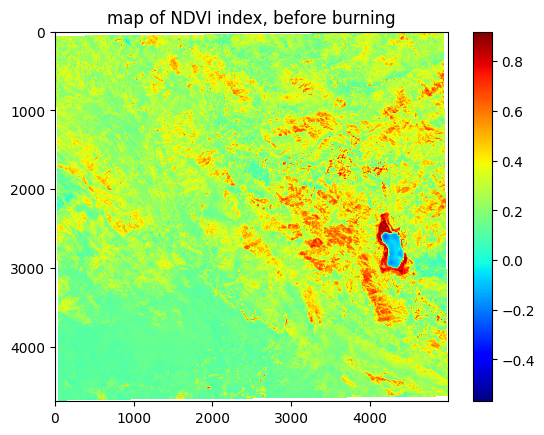

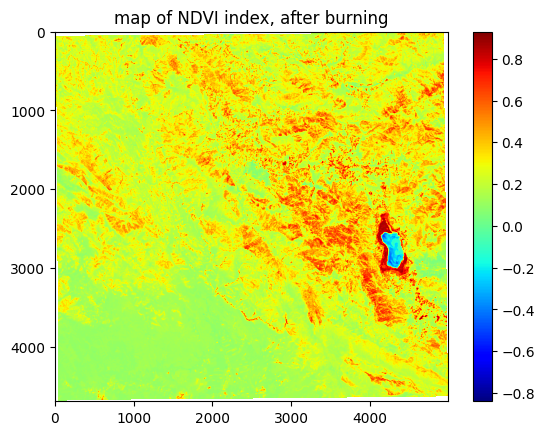

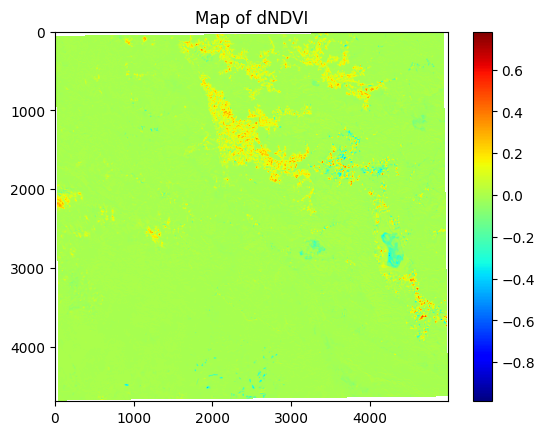

Number of pixels in class Water or/ bare soil: 14610215
Area of class Water or/ bare soil: 1461021500 square meters
Number of pixels in class Very low: 8473136
Area of class Very low: 847313600 square meters
Number of pixels in class Low: 321262
Area of class Low: 32126200 square meters
Number of pixels in class Moderate Low: 45417
Area of class Moderate Low: 4541700 square meters
Number of pixels in class Moderate High: 849
Area of class Moderate High: 84900 square meters
Number of pixels in class High: 42
Area of class High: 4200 square meters
the time for NDVI Calculations is :  48 seconds


In [6]:
t4 = time.time()

NDVI1 = Core.Ndvi(im_before_bands[8],im_before_bands[3])
NDVI2 = Core.Ndvi(im_after_bands[8],im_after_bands[3])    
dNDVI_index = NDVI2-NDVI1
Core.ploting(NDVI1,'map of NDVI index, before burning') 
Core.ploting(NDVI2,'map of NDVI index, after burning') 
Core.ploting(dNDVI_index,'Map of dNDVI') 

Core.NDVIclassing(dNDVI_index, "dNDVI_index_output_file.txt")

t5 = time.time()

print("the time for NDVI Calculations is : ",str(int(t5-t4)), "seconds")


In [8]:
Core.NDVIclassing(NDVI2, "NDVI2_index_output_file.txt")

Number of pixels in class Water or/ bare soil: 550676
Area of class Water or/ bare soil: 55067600 square meters
Number of pixels in class Very low: 9830219
Area of class Very low: 983021900 square meters
Number of pixels in class Low: 9272729
Area of class Low: 927272900 square meters
Number of pixels in class Moderate Low: 2876158
Area of class Moderate Low: 287615800 square meters
Number of pixels in class Moderate High: 548182
Area of class Moderate High: 54818200 square meters
Number of pixels in class High: 372957
Area of class High: 37295700 square meters


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# NBR+

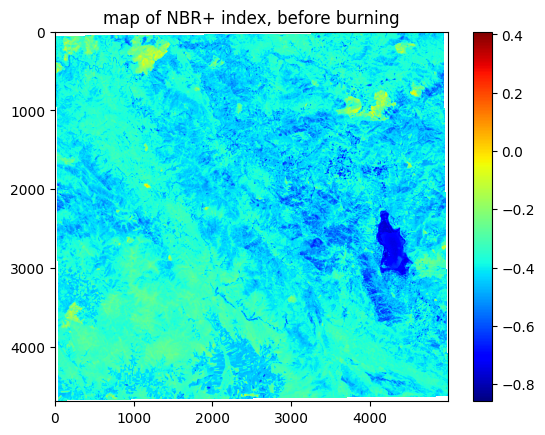

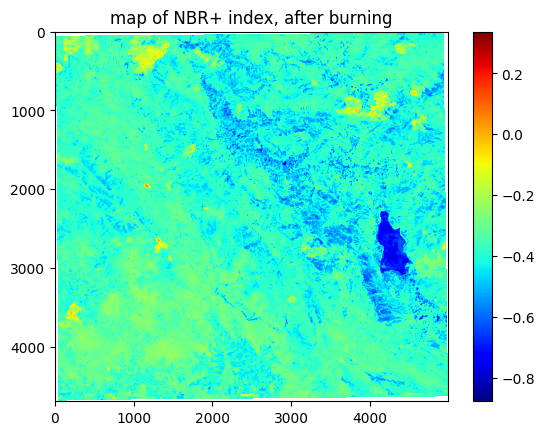

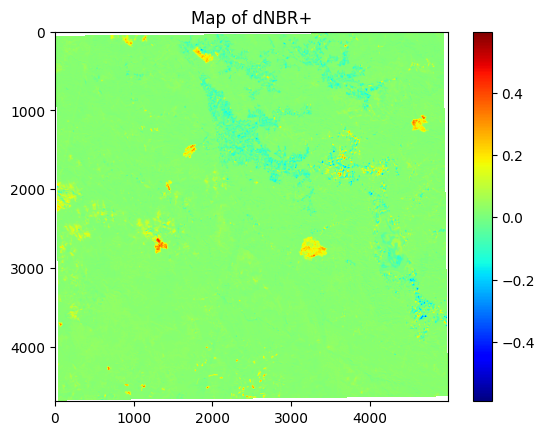

Number of pixels in class High vegetation growth after fire: 452711
Area of class High vegetation growth after fire: 45271100 square meters
Number of pixels in class Low growth of post-fire vegetation: 253401
Area of class Low growth of post-fire vegetation: 25340100 square meters
Number of pixels in class Unburned: 22323127
Area of class Unburned: -2062654596 square meters
Number of pixels in class Burned areas with low severity: 375796
Area of class Burned areas with low severity: 37579600 square meters
Number of pixels in class Burned areas with moderate/low severity: 44698
Area of class Burned areas with moderate/low severity: 4469800 square meters
Number of pixels in class Burned areas with moderate/high severity: 1188
Area of class Burned areas with moderate/high severity: 118800 square meters
the time for NBR+ Calculations is :  48 seconds


In [6]:
t6 = time.time()

NBRp1 = Core.NBRPlus(im_before_bands[11], im_before_bands[8], im_before_bands[2], im_before_bands[1])
NBRp2 = Core.NBRPlus(im_after_bands[11], im_after_bands[8], im_after_bands[2], im_after_bands[1])
DNBRp_index = NBRp2-NBRp1

Core.ploting(NBRp1,'map of NBR+ index, before burning') 
Core.ploting(NBRp2,'map of NBR+ index, after burning') 
Core.ploting(DNBRp_index,'Map of dNBR+') 

Core.NbrPlusburnseverity(DNBRp_index, "DNBRp_index_output_file.txt")

t7 = time.time()
print("the time for NBR+ Calculations is : ",str(int(t7-t6)), "seconds")


# NBR

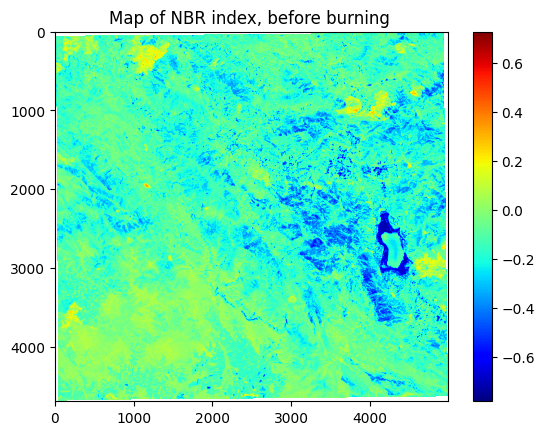

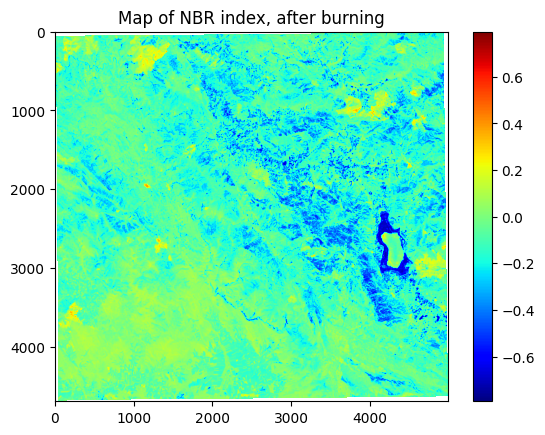

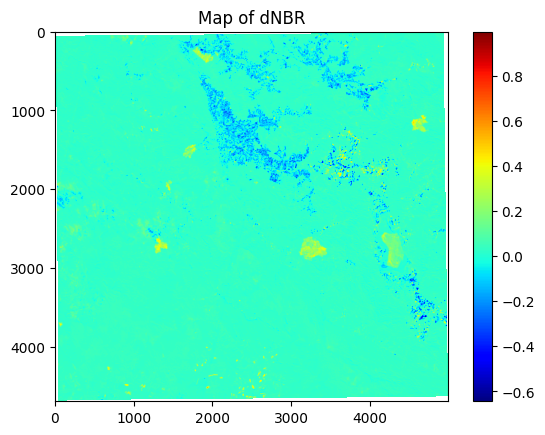

Number of pixels in class High vegetation growth after fire: 572434
Area of class High vegetation growth after fire: 57243400 square meters
Number of pixels in class Low growth of post-fire vegetation: 514490
Area of class Low growth of post-fire vegetation: 51449000 square meters
Number of pixels in class Unburned: 21695287
Area of class Unburned: -2125438596 square meters
Number of pixels in class Burned areas with low severity: 539758
Area of class Burned areas with low severity: 53975800 square meters
Number of pixels in class Burned areas with moderate/low severity: 109442
Area of class Burned areas with moderate/low severity: 10944200 square meters
Number of pixels in class Burned areas with moderate/high severity: 19510
Area of class Burned areas with moderate/high severity: 1951000 square meters
the time for NBR Calculations is :  48 seconds


In [7]:
t2 = time.time()

NBR1 = Core.nbr(im_before_bands[11],im_before_bands[8])
NBR2 = Core.nbr(im_after_bands[11],im_after_bands[8])
DNBR_index = NBR2-NBR1
Core.ploting(NBR1,'Map of NBR index, before burning ') 
Core.ploting(NBR2,'Map of NBR index, after burning') 
Core.ploting(DNBR_index,'Map of dNBR')

Core.Nbrburnseverity(DNBR_index, "DNBR_index_output_file.txt")

t3 = time.time()
print("the time for NBR Calculations is : ",str(int(t3-t2)), "seconds") 


In [8]:
import numpy as np
import scipy.io
image_np1 = np.array(dNDVI_index)
scipy.io.savemat('dNDVI_index.mat', {'image_data': image_np1})

image_np2 = np.array(DNBRp_index)
scipy.io.savemat('DNBRp_index.mat', {'image_data': image_np2})

image_np3 = np.array(DNBR_index)
scipy.io.savemat('DNBR_index.mat', {'image_data': image_np3})
